# Exercise 1: Post-operative nausea

### a)  Discuss whether a contingency table test is appropriate here. If yes, perform this test in order to test whether the different medicines work equally well against nausea. Where are the main inconsistencies?

Yes contingency table test is appropriate here. There are two factors (nausea level & medicines) and the 'expected' values are all above 5, so the test is reliable.


In [2]:
nausea = read.table("/Users/Wes/Downloads/nauseatable.txt",header=TRUE)
View(nausea)
z = chisq.test(nausea) ; z
#--> p-value = 0.03643

,Incidence.of.no.nausea,Incidence.of.Nausea
,<int>,<int>
Chlorpromazine,100,52
Pentobarbital(100mg),32,35
Pentobarbital(150mg),48,37



	Pearson's Chi-squared test

data:  nausea
X-squared = 6.6248, df = 2, p-value = 0.03643


In [3]:
z$expected #table of expected values, no need to state inconsistency since values are all bigger than 5
z$observed # original table values
z$residuals

,Incidence.of.no.nausea,Incidence.of.Nausea
Chlorpromazine,90.00000,62.00000
Pentobarbital(100mg),39.67105,27.32895
Pentobarbital(150mg),50.32895,34.67105


,Incidence.of.no.nausea,Incidence.of.Nausea
Chlorpromazine,100,52
Pentobarbital(100mg),32,35
Pentobarbital(150mg),48,37


,Incidence.of.no.nausea,Incidence.of.Nausea
Chlorpromazine,1.0540926,-1.270001
Pentobarbital(100mg),-1.2179181,1.467383
Pentobarbital(150mg),-0.3282848,0.395527


#### The different medicines work equally well against nausea?
No, this looks like the test for homogeneity (http://analyticswithr.com/chisquare.html). 

if p-value is < significance level (0.05), then it's more Heterogeneous
 
if p-value is > significance level (0.05), then it's more Homogeneous

Since the p-value is 0.036, we can reject the null hypothesis and conclude that medicines and nausea levels are not independent from each other.

Also, we can conclude that the samples differ in their distribution between the categories/levels, so the samples are more heterogeneous.

(they do not work equally well)

---

### b)  Perform a permutation test in order to test whether the different medicines work equally well against nausea. Permute the medicine labels for this purpose. Use as test statistic the chisquare test statistic for contingency tables, which can be extracted from the output of the command chisq.test. (Hint: make a data frame in R consisting of two columns. One column should contain an indicator whether or not the patient in that row suffered from nausea, and the other column should indicate the medicine.)

#### create dataframe of two factors (nausea_level and medicine)


In [5]:
medicine = factor(rep(1:3,c(152,67,85)), labels = c("Chlorpromazine","Pentobarbital(100mg)","Pentobarbital(150mg)"))
nausea_level = factor(rep(1:6,c(100,52,32,35,48,37)), labels = c("no_nausea", "nausea","no_nausea", "nausea","no_nausea", "nausea"))
perm_df = data.frame(nausea_level,medicine)
perm_df

nausea_level,medicine
<fct>,<fct>
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine
no_nausea,Chlorpromazine


#### Perform permutation test itself

The following objects are masked _by_ .GlobalEnv:

    medicine, nausea_level


The following objects are masked from perm_df (pos = 3):

    medicine, nausea_level


The following objects are masked from perm_df (pos = 4):

    medicine, nausea_level




X-squared 
 6.624765

[1] 0.036

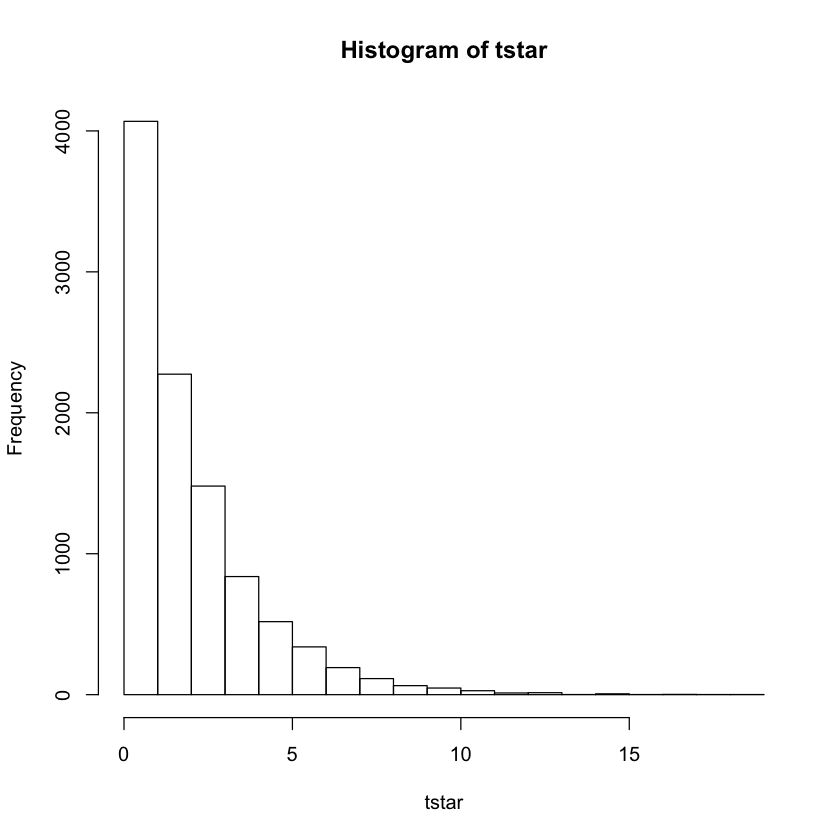

In [8]:
attach(perm_df)
mystat=function(x,y)  chisq.test(x,y)$statistic

B=10000
tstar=numeric(B)
for (i in 1:B) {
  medicinestar=sample(medicine)    ## permuting the labels
  tstar[i]=mystat(nausea_level, medicinestar) }
myt=mystat(nausea_level,medicine)

hist(tstar)
myt

pl=sum(tstar<myt)/B
pr=sum(tstar>myt)/B
#pl
#pr
min(pl,pr)

---

### c)  Compare the p-value found by the permutation test with the p-value found from the chisquare test for contingency tables. Explain the difference/equality of the two p-values.

A random run of the permutation test (B=10000) yields a p-value of 0.036, whereas the p-value of the chisquare test for contingency tables is 0.0364.

The similarity in p-values is expected, since the distributions are the same (?). 

The permutation consists also of the same test-statistic as the contingency table test (chisquare test).